Tasks
1. Validate data, Verify data-types of feature and target
2. Check duplicate, Handle missing values, encoding/normalization
3. Five point Summary
4. Find out how to balance the dataset other wise model will be biased
5. Heatmap?
6. Independent and Dependent variables/features
7. Weekly, Monthly, Daily water level plot and analysis at each check point
8. Box-plot and Skewness should not be altered as mentioned in books - could be a indicator for flood
9. Is the data sufficient to build model for our usecase?

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Functions

In [2]:
def attribute_plot(data, time, attribute, plot_name):
    plt.figure(figsize=(15,5))
    plt.plot(data[time], data[attribute])
    #labels = data[time]
    #plt.legend()
    plt.xlabel(xlabel=time)
    plt.ylabel(ylabel=attribute)
    #plt.xticks(data[time], labels, rotation='vertical')
    plt.title(label=plot_name)
    plt.grid(True)

In [3]:
# date separation 
    
def separate_date(data):
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month_name()
    data['week'] = data['date'].dt.isocalendar().week
    data['day'] = data['date'].dt.day_name()
    return data

In [14]:
# distribution plotting

def distribution(data, attribute, title):
    plt.figure(figsize=(10,5))
    sns.histplot(data[attribute], alpha=0.5)
    plt.axvline(data[attribute].median(), color='r', linestyle='dashed', linewidth=2, label='median value')
    plt.axvline(data[attribute].mean(), color='purple', linestyle='dashed', linewidth=2, label='average value')
    plt.axvline(data[attribute].quantile(0.25), color='r', linestyle='dotted', linewidth=3, label='25% and 75% values')
    plt.axvline(data[attribute].quantile(0.75), color='r', linestyle='dotted', linewidth=3)
    plt.legend()
    plt.title(label=title)
    plt.show()
    
# daily plotting

def daily_plot(data, first_alert_level, second_alert_level):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(data.date, data.waterlevel)
    ax.hlines(first_alert_level, data.date.iloc[0], data.date.iloc[-1], label='first flood alert line', color='orange')
    ax.hlines(second_alert_level, data.date.iloc[0], data.date.iloc[-1], label='second flood alert line', color='r')
    a1=data[data.flood_alert=='first']
    x1=a1.date
    y1=a1.waterlevel
    plt.scatter(x1, y1, label='1st alert', color='orange', s=20, marker='X')
    a2=data[data.flood_alert=='second']
    x2=a2.date
    y2=a2.waterlevel
    plt.scatter(x2, y2, label='2st alert', color='r', s=20, marker='o')
    plt.legend()
    plt.xlabel(xlabel='year')
    plt.ylabel(ylabel='water level')
    plt.title(label='daily water level')
    plt.show()

In [2]:
# flood alerts adding (levels according to the Republic Hydrometeorological Service of Serbia) 

def flood_alert(data, first_alert_level, second_alert_level):
    data['flood_alert'] = data['waterlevel'].map(lambda x: 'first' if (x>=first_alert_level and x<second_alert_level)\
                                                 else ('second' if x>=second_alert_level else 'no'))
    sns.histplot(data['flood_alert'])
    plt.title(label='flood alerts distribution')
    plt.show()
    return print(f'first flood alert = {sum(data.flood_alert=="first")}, \
    second flood alert = {sum(data.flood_alert=="second")}')

# daily water level plotting

def daily_water_level(data, first_alert_level, second_alert_level):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(data.date, data.waterlevel)
    ax.hlines(first_alert_level, data.date.iloc[0], data.date.iloc[-1], label='first flood alert line', color='orange')
    ax.hlines(second_alert_level, data.date.iloc[0], data.date.iloc[-1], label='second flood alert line', color='r')
    a1=data[data.flood_alert=='first']
    x1=a1.date
    y1=a1.waterlevel
    plt.scatter(x1, y1, label='1st alert', color='orange', s=20, marker='X')
    a2=data[data.flood_alert=='second']
    x2=a2.date
    y2=a2.waterlevel
    plt.scatter(x2, y2, label='2st alert', color='r', s=20, marker='o')
    plt.legend()
    plt.xlabel(xlabel='year')
    plt.ylabel(ylabel='water level')
    plt.title(label='daily water level')
    plt.show()

# date separation 
    
def separate_date(data):
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month_name()
    data['week'] = data['date'].dt.isocalendar().week
    data['day'] = data['date'].dt.day_name()
    return data

# statistics for water level grouped by year, month, week
    
def data_stat(data, union_attribute):
    data_grouped_by = data.groupby(union_attribute, as_index=False, sort=False)
    data_grouped_by = data_grouped_by['waterlevel']
    data_grouped_by = data_grouped_by.agg([np.mean, np. median, np.max, np.std, np.var]).reset_index()
    return data_grouped_by
    
# yearly, monthly and weekly water level plotting    
    
def water_level_plot(data, union_attribute, plot_name):
# union_attributes = 'year', 'month', 'week'
# plot names = 'yearly water level', 'monthly water level', 'weekly water level'
    
    plt.figure(figsize=(15,5))
    plt.plot(data[union_attribute], data['mean'], label="average", c='purple')
    plt.plot(data[union_attribute], data['median'], label="median", c='b')
    plt.plot(data[union_attribute], data['amax'], label="max", c='r')
    plt.plot(data[union_attribute], data['std'], label="std", c='g')
    plt.legend()
    plt.xlabel(xlabel=union_attribute)
    plt.ylabel(ylabel='water level')
    plt.title(label=plot_name)
    plt.grid(True)
    plt.show()    

### Import dependencies

In [3]:
precipitation = pd.read_csv('climateknowledgeportal_worldbank_org_precipitation_1901-2021_Serbia.csv')
precipitation = precipitation[precipitation.Year >= 2000]
precipitation

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
99,2000,32.14,28.98,43.01,54.84,34.28,31.10,53.19,11.21,70.55,28.25,47.93,54.21
100,2001,68.14,33.74,62.54,83.79,62.44,124.87,55.26,37.44,144.98,15.28,74.42,35.31
101,2002,20.11,28.22,28.80,71.24,82.89,64.71,79.91,93.42,99.61,81.11,44.67,58.87
102,2003,88.70,32.76,9.50,38.48,54.64,59.39,68.87,19.44,69.02,132.12,48.27,40.07
103,2004,72.65,51.50,39.21,88.53,87.43,90.52,72.70,68.76,57.35,59.43,106.92,67.73
104,2005,42.00,84.33,55.64,63.92,74.63,91.83,117.70,127.72,86.69,28.28,38.01,98.91
105,2006,40.15,54.40,80.37,74.24,60.35,112.28,53.22,121.13,45.26,38.16,33.98,39.63
106,2007,52.32,64.41,68.46,10.83,93.87,76.78,31.43,66.94,89.77,96.72,107.36,45.41
107,2008,36.60,11.56,77.27,65.81,53.08,119.11,70.89,31.31,82.91,38.25,56.89,75.87
108,2009,72.00,56.77,56.47,30.43,49.18,129.92,61.87,59.83,36.09,93.12,69.62,107.18


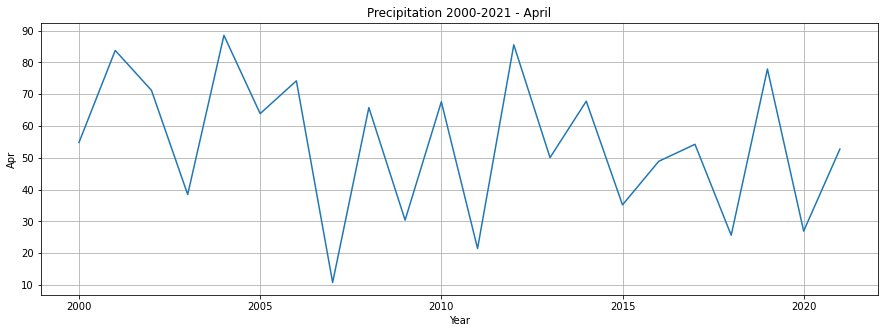

In [7]:
attribute_plot(precipitation, 'Year', 'Apr', 'Precipitation 2000-2021 - April')

In [8]:
floods = pd.read_csv('daily_precipitation_flood_occurence_SERBIA_2000_to_2018_updated.csv')
floods

,date,precipitation_mm,flood_occurrence
0,05-04-2000,11,1
1,06-04-2000,13,1
2,07-04-2000,1,1
3,08-04-2000,0,1
4,09-04-2000,1,1
...,...,...,...
496,03-04-2018,1,1
497,04-04-2018,6,1
498,05-04-2018,2,1
499,06-04-2018,0,1


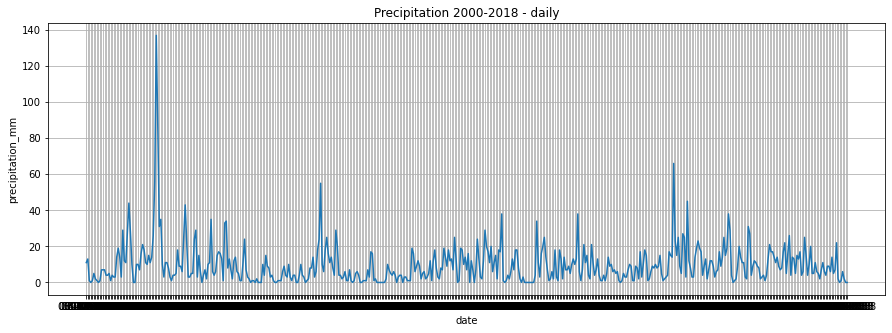

In [9]:
attribute_plot(floods, 'date', 'precipitation_mm', 'Precipitation 2000-2018 - daily')

In [40]:
data = pd.read_csv('merged_wtr-level_alerts_precip_hum_temp_press_wind_with-NaN_v4.csv')
data

,date,belgrade_water_level_cm,belgrade_flood_alert,pancevo_water_level_cm,pancevo_flood_alert,zemun_water_level_cm,zemun_flood_alert,belgrade_precipitation_mm,belgrade_pressure_hg,belgrade_temperature_c,belgrade_humidity_pct,belgrade_windspeed_kph
0,2000-01-01,461.0,0,503.0,0.0,502.0,0.0,NaN,29.840065,-2.6,89.0,11.52
1,2000-01-02,474.0,0,516.0,0.0,516.0,0.0,0.0,29.925702,-1.3,85.0,5.04
2,2000-01-03,478.0,0,520.0,0.0,520.0,0.0,0.0,29.946373,-1.1,83.0,5.04
3,2000-01-04,474.0,0,517.0,0.0,516.0,0.0,NaN,29.792817,-1.4,93.0,2.16
4,2000-01-05,464.0,0,513.0,0.0,508.0,0.0,NaN,29.783958,-0.9,95.0,5.76
...,...,...,...,...,...,...,...,...,...,...,...,...
8396,2022-12-27,358.0,0,NaN,NaN,388.0,0.0,NaN,NaN,NaN,NaN,NaN
8397,2022-12-28,356.0,0,NaN,NaN,388.0,0.0,NaN,NaN,NaN,NaN,NaN
8398,2022-12-29,362.0,0,NaN,NaN,396.0,0.0,NaN,NaN,NaN,NaN,NaN
8399,2022-12-30,370.0,0,NaN,NaN,404.0,0.0,NaN,NaN,NaN,NaN,NaN


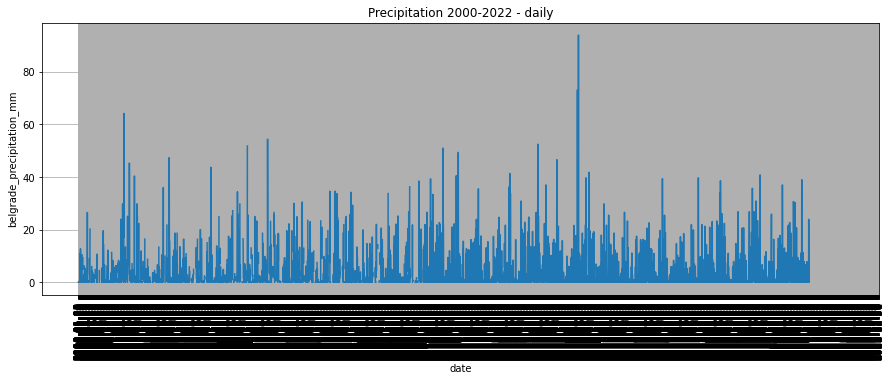

In [13]:
attribute_plot(data, 'date', 'belgrade_precipitation_mm', 'Precipitation 2000-2022 - daily')

### Data types verification

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8401 non-null   object 
 1   belgrade_water_level_cm    8401 non-null   float64
 2   belgrade_flood_alert       8401 non-null   int64  
 3   pancevo_water_level_cm     8036 non-null   float64
 4   pancevo_flood_alert        8036 non-null   float64
 5   zemun_water_level_cm       8262 non-null   float64
 6   zemun_flood_alert          8262 non-null   float64
 7   belgrade_precipitation_mm  5885 non-null   float64
 8   belgrade_pressure_hg       7671 non-null   float64
 9   belgrade_temperature_c     7671 non-null   float64
 10  belgrade_humidity_pct      7671 non-null   float64
 11  belgrade_windspeed_kph     4018 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 787.7+ KB


In [43]:
data['date'] = pd.to_datetime(data['date'])
#data['pancevo_flood_alert'] = data['pancevo_flood_alert'].astype('int64')
#data['zemun_flood_alert'] = data['zemun_flood_alert'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8401 non-null   datetime64[ns]
 1   belgrade_water_level_cm    8401 non-null   float64       
 2   belgrade_flood_alert       8401 non-null   int64         
 3   pancevo_water_level_cm     8036 non-null   float64       
 4   pancevo_flood_alert        8036 non-null   float64       
 5   zemun_water_level_cm       8262 non-null   float64       
 6   zemun_flood_alert          8262 non-null   float64       
 7   belgrade_precipitation_mm  5885 non-null   float64       
 8   belgrade_pressure_hg       8036 non-null   float64       
 9   belgrade_temperature_c     7671 non-null   float64       
 10  belgrade_humidity_pct      7671 non-null   float64       
 11  belgrade_windspeed_kph     7670 non-null   float64       
dtypes: dat

### Missing values and duplicates check

In [7]:
data.isna().sum()

date                            0
belgrade_water_level_cm         0
belgrade_flood_alert            0
pancevo_water_level_cm        365
pancevo_flood_alert           365
zemun_water_level_cm          139
zemun_flood_alert             139
belgrade_precipitation_mm    2516
belgrade_pressure_hg          730
belgrade_temperature_c        730
belgrade_humidity_pct         730
belgrade_windspeed_kph       4383
dtype: int64

In [8]:
data.duplicated().any()

False

### Five point summary

In [9]:
data.describe()

,belgrade_water_level_cm,belgrade_flood_alert,pancevo_water_level_cm,pancevo_flood_alert,zemun_water_level_cm,zemun_flood_alert,belgrade_precipitation_mm,belgrade_pressure_hg,belgrade_temperature_c,belgrade_humidity_pct,belgrade_windspeed_kph
count,8401.000000,8401.000000,8036.000000,8036.000000,8262.000000,8262.000000,5885.000000,7671.000000,7671.000000,7671.000000,4018.000000
mean,283.631711,0.039162,353.195869,0.049278,334.384168,0.035464,3.055616,29.810642,13.959119,68.152131,10.693878
std,104.576325,0.193992,89.867574,0.216462,100.685471,0.184960,6.169385,0.315477,9.351961,14.460130,5.339588
min,12.000000,0.000000,112.000000,0.000000,34.000000,0.000000,0.000000,28.729737,-15.000000,23.000000,2.000000
25%,205.000000,0.000000,283.000000,0.000000,256.000000,0.000000,0.000000,29.562483,7.000000,58.000000,7.000000
50%,264.000000,0.000000,335.000000,0.000000,315.000000,0.000000,0.400000,29.830000,14.400000,69.000000,10.000000
75%,345.000000,0.000000,404.000000,0.000000,393.000000,0.000000,3.300000,30.030000,21.400000,79.000000,13.000000
max,738.000000,1.000000,777.000000,1.000000,782.000000,1.000000,94.000000,30.830000,37.000000,100.000000,41.000000


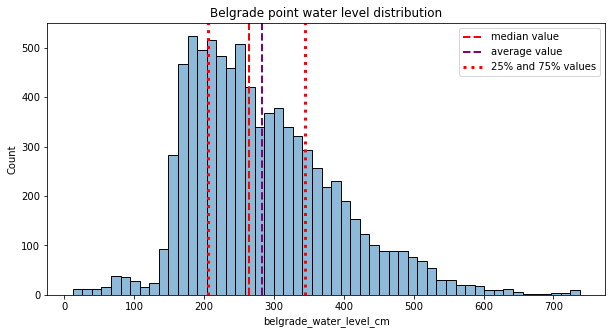

In [15]:
distribution(data, 'belgrade_water_level_cm', 'Belgrade point water level distribution')

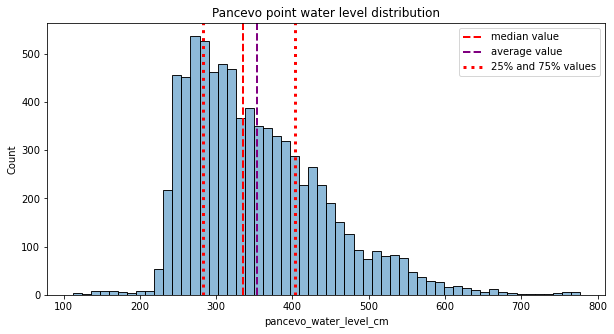

In [16]:
distribution(data, 'pancevo_water_level_cm', 'Pancevo point water level distribution')

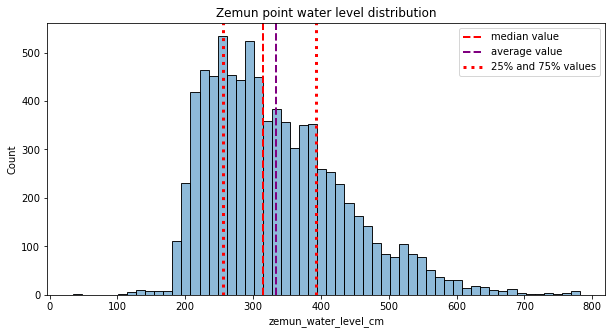

In [17]:
distribution(data, 'zemun_water_level_cm', 'Zemun point water level distribution')

### Water level plotting

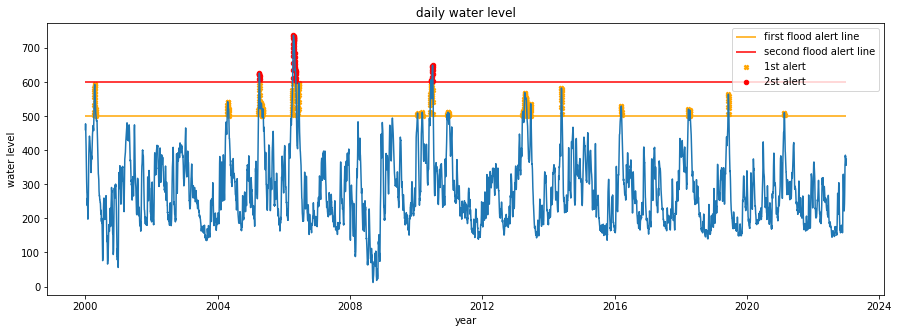

In [11]:
daily_water_level(data, first_alert_level, second_alert_level)

In [19]:
# getting dataframes for plotting
data = separate_date(data)
data_grouped_by_year = data_stat(data, 'year')
data_grouped_by_month = data_stat(data, 'month')
data_grouped_by_week = data_stat(data, 'week').sort_values(by='week')

NameError: name 'data_stat' is not defined

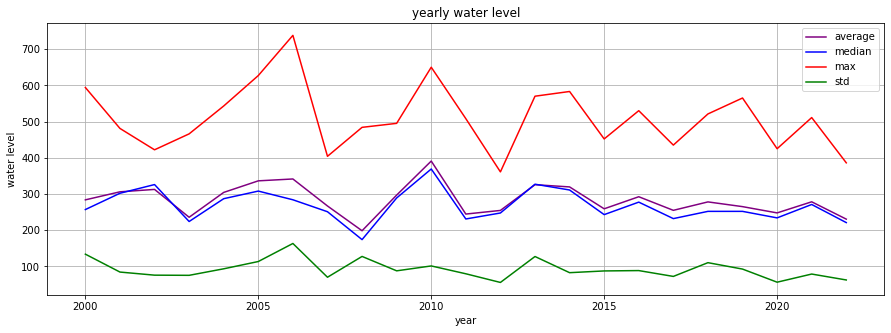

In [18]:
water_level_plot(data_grouped_by_year, 'year', 'yearly water level')

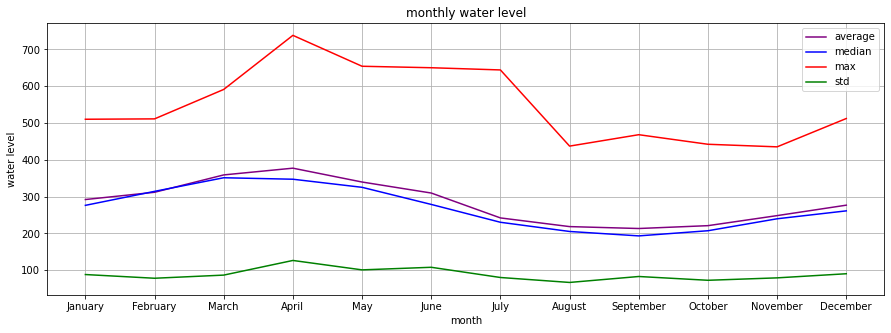

In [19]:
water_level_plot(data_grouped_by_month, 'month', 'monthly water level')

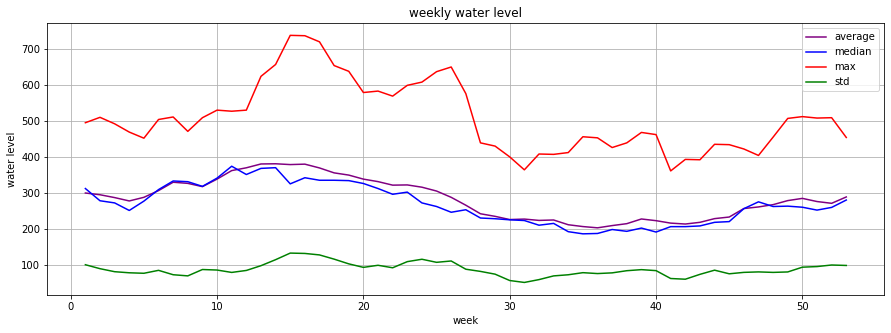

In [20]:
water_level_plot(data_grouped_by_week, 'week', 'weekly water level')

### Attributes plotting

In [44]:
data = separate_date(data)
data = data[data.year==2019]
data

,date,belgrade_water_level_cm,belgrade_flood_alert,pancevo_water_level_cm,pancevo_flood_alert,zemun_water_level_cm,zemun_flood_alert,belgrade_precipitation_mm,belgrade_pressure_hg,belgrade_temperature_c,belgrade_humidity_pct,belgrade_windspeed_kph,year,month,week,day
6940,2019-01-01,282.0,0,344.0,0.0,330.0,0.0,0.1,29.822347,2.0,82.0,8.0,2019,January,1,Tuesday
6941,2019-01-02,271.0,0,334.0,0.0,269.0,0.0,2.8,29.527047,3.0,73.0,15.0,2019,January,1,Wednesday
6942,2019-01-03,252.0,0,317.0,0.0,323.0,0.0,4.3,29.701274,-1.0,79.0,17.0,2019,January,1,Thursday
6943,2019-01-04,234.0,0,302.0,0.0,344.0,0.0,0.3,29.851877,-2.0,68.0,11.0,2019,January,1,Friday
6944,2019-01-05,224.0,0,293.0,0.0,315.0,0.0,2.1,29.609731,-2.0,70.0,11.0,2019,January,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,2019-12-27,305.0,0,357.0,0.0,343.0,0.0,0.5,29.724898,4.0,79.0,14.0,2019,December,52,Friday
7301,2019-12-28,320.0,0,370.0,0.0,358.0,0.0,2.5,29.860736,2.0,82.0,17.0,2019,December,52,Saturday
7302,2019-12-29,331.0,0,381.0,0.0,369.0,0.0,3.1,30.023151,-1.0,74.0,19.0,2019,December,52,Sunday
7303,2019-12-30,340.0,0,391.0,0.0,380.0,0.0,0.0,30.161942,-2.0,78.0,10.0,2019,December,1,Monday


In [34]:
data = data[data.month=='July']
data

,date,belgrade_water_level_cm,belgrade_flood_alert,pancevo_water_level_cm,pancevo_flood_alert,zemun_water_level_cm,zemun_flood_alert,belgrade_precipitation_mm,belgrade_pressure_hg,belgrade_temperature_c,belgrade_humidity_pct,belgrade_windspeed_kph,year,month,week,day
8217,2022-07-01,176.0,0,NaN,NaN,400.0,0.0,NaN,NaN,NaN,NaN,NaN,2022,July,26,Friday
8218,2022-07-02,177.0,0,NaN,NaN,253.0,0.0,NaN,NaN,NaN,NaN,NaN,2022,July,26,Saturday
8219,2022-07-03,177.0,0,NaN,NaN,278.0,0.0,NaN,NaN,NaN,NaN,NaN,2022,July,26,Sunday
8220,2022-07-04,181.0,0,NaN,NaN,339.0,0.0,NaN,NaN,NaN,NaN,NaN,2022,July,27,Monday
8221,2022-07-05,184.0,0,NaN,NaN,308.0,0.0,NaN,NaN,NaN,NaN,NaN,2022,July,27,Tuesday
8222,2022-07-06,190.0,0,NaN,NaN,253.0,0.0,NaN,NaN,NaN,NaN,NaN,2022,July,27,Wednesday
8223,2022-07-07,188.0,0,NaN,NaN,231.0,0.0,NaN,NaN,NaN,NaN,NaN,2022,July,27,Thursday
8224,2022-07-08,186.0,0,NaN,NaN,202.0,0.0,NaN,NaN,NaN,NaN,NaN,2022,July,27,Friday
8225,2022-07-09,178.0,0,NaN,NaN,211.0,0.0,NaN,NaN,NaN,NaN,NaN,2022,July,27,Saturday
8226,2022-07-10,179.0,0,NaN,NaN,314.0,0.0,NaN,NaN,NaN,NaN,NaN,2022,July,27,Sunday


In [18]:
def attributes_plots(data):
    fig, ax = plt.subplots(8, 1, figsize=(15, 15))
    
    def plot_settings(data, i, attribute, label, color):
        ax[i].plot(data['date'], data[attribute], label=label, color=color)
        ax[i].legend()
        ax[i].grid()
    
    plot_settings(data, 0, 'zemun_water_level_cm', 'zemun water level', 'b')
    plot_settings(data, 1, 'belgrade_water_level_cm', 'belgrad water level', 'r')
    plot_settings(data, 2, 'pancevo_water_level_cm', 'pancevo water level','g')
    plot_settings(data, 3, 'belgrade_precipitation_mm', 'precipitation', 'black')
    plot_settings(data, 4, 'belgrade_pressure_hg', 'pressure', 'c')
    plot_settings(data, 5, 'belgrade_temperature_c', 'temperature', 'm')
    plot_settings(data, 6, 'belgrade_humidity_pct', 'humidity', 'y')
    plot_settings(data, 7, 'belgrade_windspeed_kph', 'windspeed', 'purple')
    

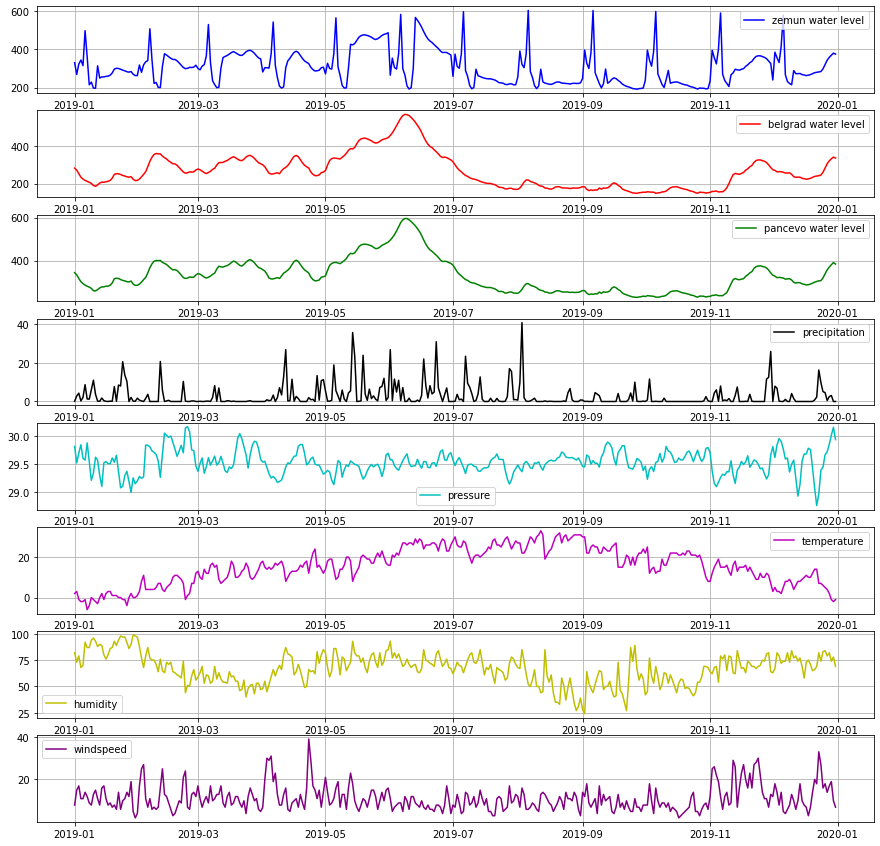

In [45]:
attributes_plots(data)

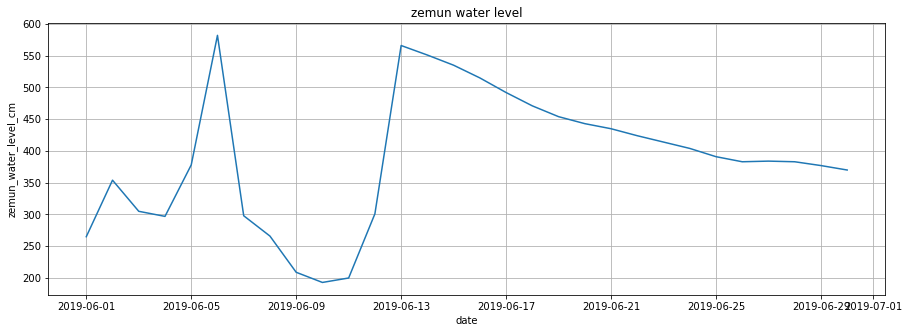

In [57]:
attribute_plot(data, 'date', 'zemun_water_level_cm', 'zemun water level')

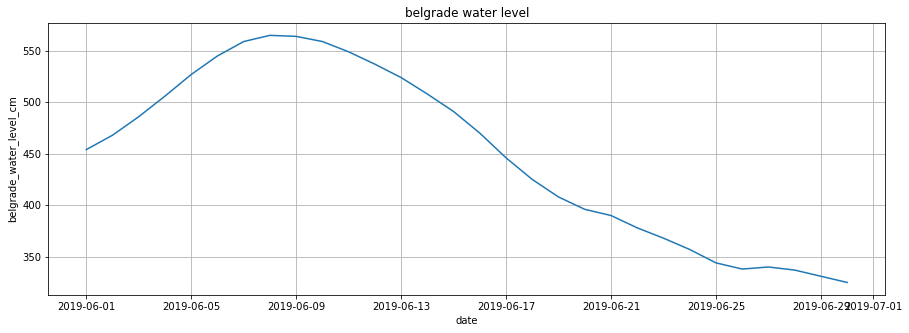

In [58]:
attribute_plot(data, 'date', 'belgrade_water_level_cm', 'belgrade water level')

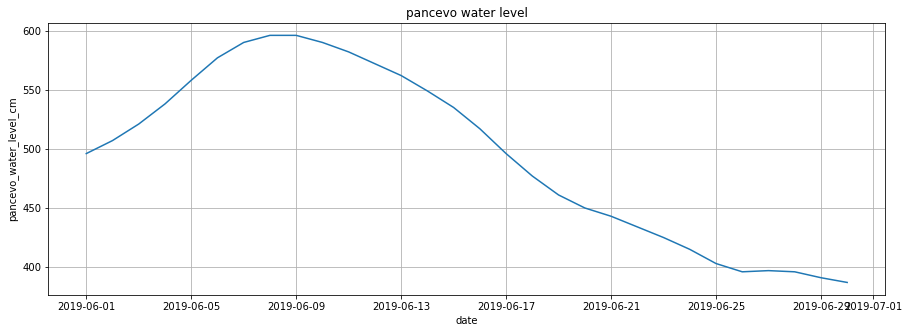

In [59]:
attribute_plot(data, 'date', 'pancevo_water_level_cm', 'pancevo water level')

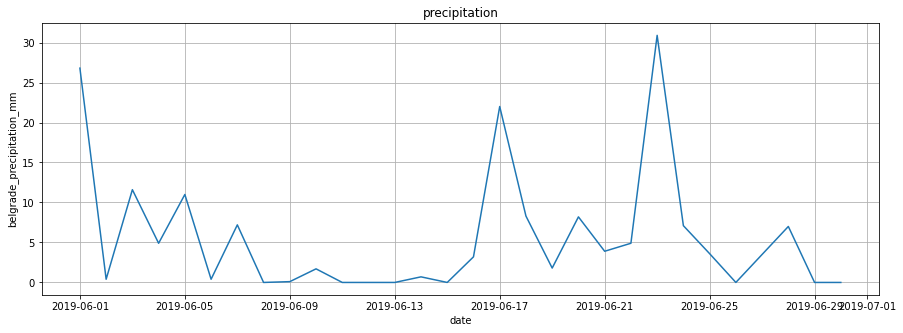

In [60]:
attribute_plot(data, 'date', 'belgrade_precipitation_mm', 'precipitation')

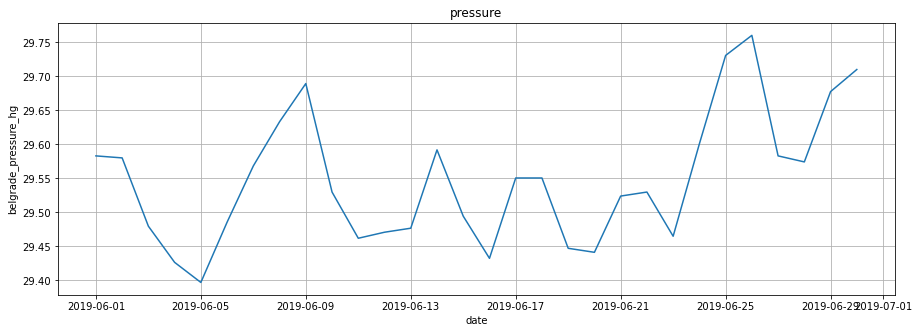

In [61]:
attribute_plot(data, 'date', 'belgrade_pressure_hg', 'pressure')

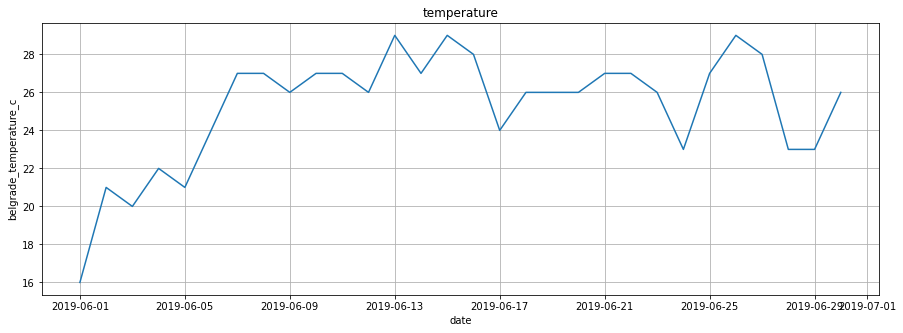

In [62]:
attribute_plot(data, 'date', 'belgrade_temperature_c', 'temperature')

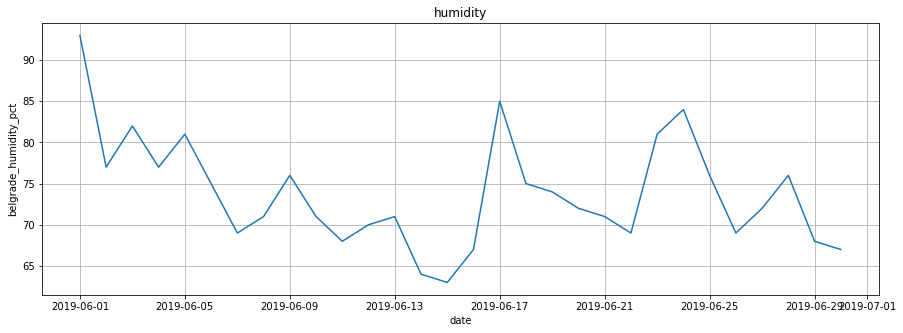

In [63]:
attribute_plot(data, 'date', 'belgrade_humidity_pct', 'humidity')

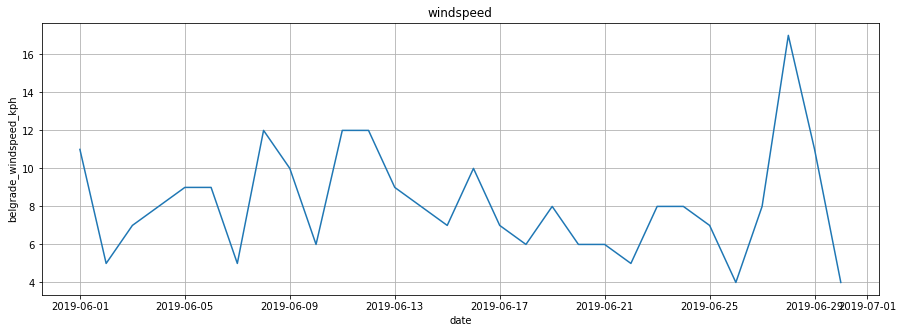

In [64]:
attribute_plot(data, 'date', 'belgrade_windspeed_kph', 'windspeed')